In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:\\Users\\raghu\\AppData\\Local\\Temp\\d7098698-796f-4a1b-a77b-b03b533e015a_drive-download-20230709T122717Z-001-1-1.zip.15a\\Walmart DataSet.zip")

In [3]:
data

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# Data Preprocessing

In [7]:
data["Date"]=pd.to_datetime(data["Date"])

In [10]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [12]:
data.duplicated().sum()

0

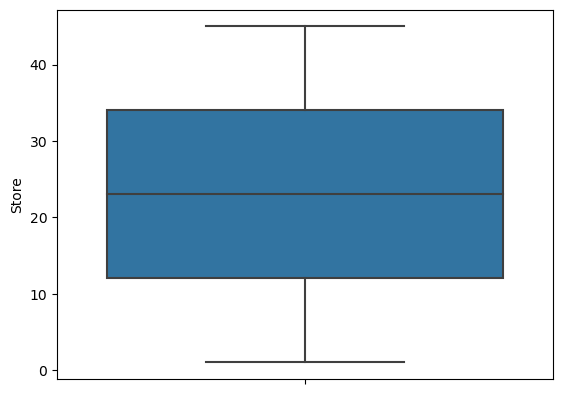

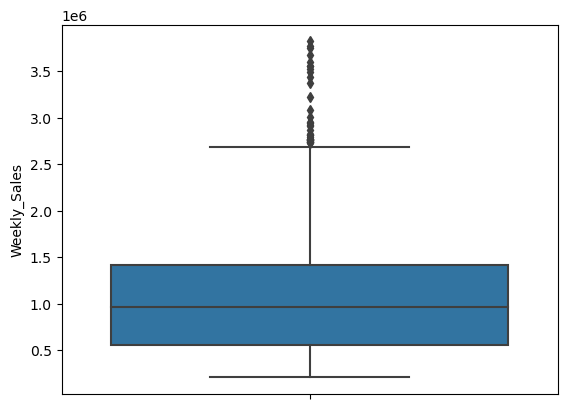

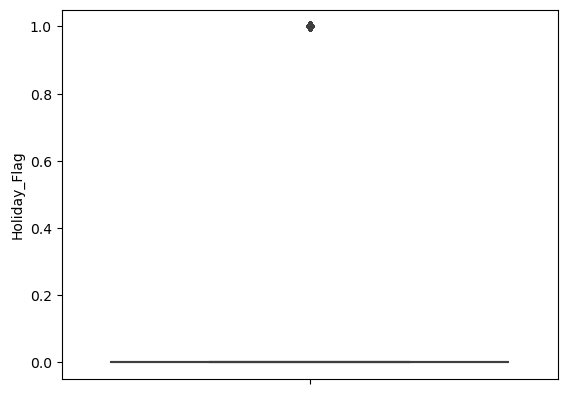

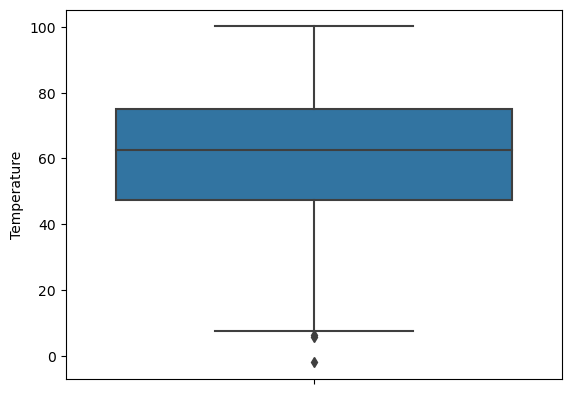

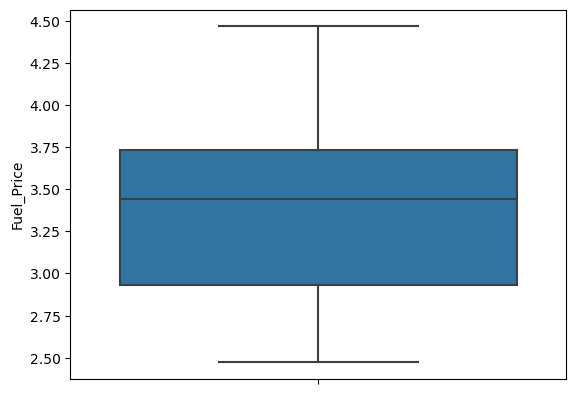

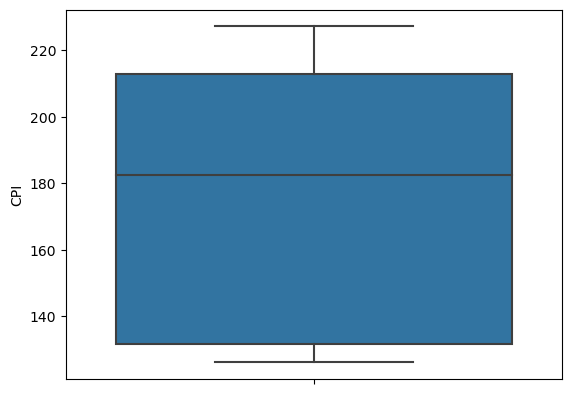

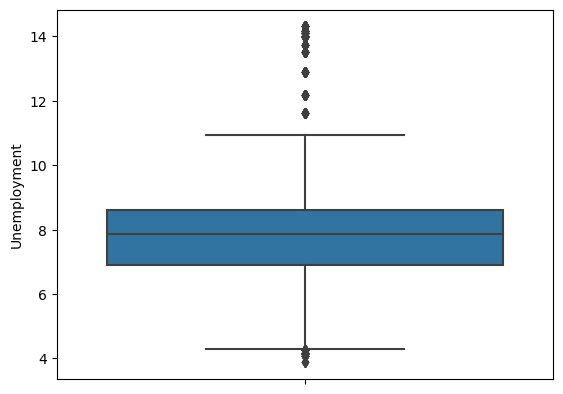

In [17]:
import seaborn as sns
for col in data.select_dtypes("number"):
    sns.boxplot(y=data[col])
    plt.show()

In [21]:
# we have outliers in weakly sales ,unemployment

w_q1=data["Weekly_Sales"].quantile(0.25)
w_q3=data["Weekly_Sales"].quantile(0.75)
iqr=w_q3-w_q1
min_range=w_q1-1.5*iqr
max_range=w_q3+1.5*iqr
data=data[(data["Weekly_Sales"]>=min_range) & (data["Weekly_Sales"]<=max_range)]

In [23]:
# we have outliers in weakly sales ,unemployment

w_q1=data["Unemployment"].quantile(0.25)
w_q3=data["Unemployment"].quantile(0.75)
iqr=w_q3-w_q1
min_range=w_q1-1.5*iqr
max_range=w_q3+1.5*iqr
data=data[(data["Unemployment"]>=min_range) & (data["Unemployment"]<=max_range)]

In [24]:
data

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-05-02    1643690.90             0        42.31       2.572   
1         1 2010-12-02    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-05-03    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-05-10     733455.07             0        64.89       3.985   
6432     45 2012-12-10     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[5920 rows x 8 columns]

# 1.a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?


In [47]:
store_regression=data.groupby("Store").apply(lambda x:x[["Weekly_Sales","Unemployment"]].corr().iloc[0,1])

In [48]:
store_analysis=pd.DataFrame({'Unemployment_sales_correlation':store_regression})

In [49]:
store_analysis

Unemployment_sales_correlation
Store                                
1                           -0.097955
2                            0.054288
3                           -0.230413
4                           -0.633422
5                           -0.207043
6                            0.016833
7                           -0.165382
8                           -0.052580
9                           -0.191534
10                           0.186979
11                          -0.020339
12                           0.015141
13                          -0.400254
14                           0.269510
15                           0.078905
16                          -0.070864
17                          -0.263600
18                           0.139179
19                           0.101464
20                          -0.109391
21                           0.218367
22                           0.039043
23                          -0.231551
24                          -0.012261
25                          -0.004958
26                          -0.066899
27                          -0.002535
28                          -0.066340
29                           0.084682
30                           0.201862
31                          -0.064738
32                          -0.099455
33                           0.101175
34                           0.017010
35                           0.483865
36                           0.833734
37                          -0.221287
38                          -0.069747
39                          -0.384681
40                          -0.213724
41                          -0.350630
42                          -0.356355
43                          -0.201954
44                          -0.780076
45                          -0.004041

In [53]:
most_affected_stores=store_analysis.sort_values(by='Unemployment_sales_correlation')
most_affected_stores

Unemployment_sales_correlation
Store                                
44                          -0.780076
4                           -0.633422
13                          -0.400254
39                          -0.384681
42                          -0.356355
41                          -0.350630
17                          -0.263600
23                          -0.231551
3                           -0.230413
37                          -0.221287
40                          -0.213724
5                           -0.207043
43                          -0.201954
9                           -0.191534
7                           -0.165382
20                          -0.109391
32                          -0.099455
1                           -0.097955
16                          -0.070864
38                          -0.069747
26                          -0.066899
28                          -0.066340
31                          -0.064738
8                           -0.052580
11                          -0.020339
24                          -0.012261
25                          -0.004958
45                          -0.004041
27                          -0.002535
12                           0.015141
6                            0.016833
34                           0.017010
22                           0.039043
2                            0.054288
15                           0.078905
29                           0.084682
33                           0.101175
19                           0.101464
18                           0.139179
10                           0.186979
30                           0.201862
21                           0.218367
14                           0.269510
35                           0.483865
36                           0.833734

In [54]:
#top five most affected stores
most_affected_stores.head()

Unemployment_sales_correlation
Store                                
44                          -0.780076
4                           -0.633422
13                          -0.400254
39                          -0.384681
42                          -0.356355

# b. If the weekly sales show a seasonal trend, when and what could be the reason?

In [77]:
data["month"]=data["Date"].dt.month
data["year"]=data["Date"].dt.year

C:\Users\raghu\AppData\Local\Temp\ipykernel_8636\2293917991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["month"]=data["Date"].dt.month
C:\Users\raghu\AppData\Local\Temp\ipykernel_8636\2293917991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["year"]=data["Date"].dt.year


In [57]:
data

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-05-02    1643690.90             0        42.31       2.572   
1         1 2010-12-02    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-05-03    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-05-10     733455.07             0        64.89       3.985   
6432     45 2012-12-10     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  month  year  
0     211.096358         8.106      5  2010  
1     211.242170         8.106     12  2010  
2     211.289143         8.106      2  2010  
3     211.319643         8.106      2  2010  
4     211.350143         8.106      5  2010  
...          ...           ...    ...   ...  
6430  192.013558         8.684      9  2012  
6431  192.170412         8.667      5  2012  
6432  192.327265         8.667     12  2012  
6433  192.330854         8.667     10  2012  
6434  192.308899         8.667     10  2012  

[5920 rows x 10 columns]

In [68]:
monthly_sales=data.groupby(['year','month'])['Weekly_Sales'].sum().reset_index()

In [69]:
monthly_sales

year  month  Weekly_Sales
0   2010      1  3.982560e+07
1   2010      2  1.802125e+08
2   2010      3  1.752329e+08
3   2010      4  1.732263e+08
4   2010      5  2.640776e+08
5   2010      6  1.344962e+08
6   2010      7  1.739798e+08
7   2010      8  1.744531e+08
8   2010      9  1.696679e+08
9   2010     10  2.157346e+08
10  2010     11  1.355024e+08
11  2010     12  2.614204e+08
12  2011      1  1.997251e+08
13  2011      2  1.761004e+08
14  2011      3  1.285975e+08
15  2011      4  2.618442e+08
16  2011      5  1.723317e+08
17  2011      6  1.320624e+08
18  2011      7  2.114892e+08
19  2011      8  1.773939e+08
20  2011      9  2.181234e+08
21  2011     10  1.732949e+08
22  2011     11  2.267053e+08
23  2011     12  1.852244e+08
24  2012      1  1.541920e+08
25  2012      2  1.269732e+08
26  2012      3  2.062019e+08
27  2012      4  1.627948e+08
28  2012      5  1.275546e+08
29  2012      6  2.612735e+08
30  2012      7  1.666296e+08
31  2012      8  1.718084e+08
32  2012      9  1.613795e+08
33  2012     10  1.690446e+08
34  2012     11  4.189975e+07
35  2012     12  4.160004e+07

In [71]:
monthly_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          36 non-null     int64  
 1   month         36 non-null     int64  
 2   Weekly_Sales  36 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 992.0 bytes


In [73]:
monthly_sales["Date"]=pd.to_datetime(monthly_sales[["year","month"]].assign(Day=1))
monthly_sales

year  month  Weekly_Sales       Date
0   2010      1  3.982560e+07 2010-01-01
1   2010      2  1.802125e+08 2010-02-01
2   2010      3  1.752329e+08 2010-03-01
3   2010      4  1.732263e+08 2010-04-01
4   2010      5  2.640776e+08 2010-05-01
5   2010      6  1.344962e+08 2010-06-01
6   2010      7  1.739798e+08 2010-07-01
7   2010      8  1.744531e+08 2010-08-01
8   2010      9  1.696679e+08 2010-09-01
9   2010     10  2.157346e+08 2010-10-01
10  2010     11  1.355024e+08 2010-11-01
11  2010     12  2.614204e+08 2010-12-01
12  2011      1  1.997251e+08 2011-01-01
13  2011      2  1.761004e+08 2011-02-01
14  2011      3  1.285975e+08 2011-03-01
15  2011      4  2.618442e+08 2011-04-01
16  2011      5  1.723317e+08 2011-05-01
17  2011      6  1.320624e+08 2011-06-01
18  2011      7  2.114892e+08 2011-07-01
19  2011      8  1.773939e+08 2011-08-01
20  2011      9  2.181234e+08 2011-09-01
21  2011     10  1.732949e+08 2011-10-01
22  2011     11  2.267053e+08 2011-11-01
23  2011     12  1.852244e+08 2011-12-01
24  2012      1  1.541920e+08 2012-01-01
25  2012      2  1.269732e+08 2012-02-01
26  2012      3  2.062019e+08 2012-03-01
27  2012      4  1.627948e+08 2012-04-01
28  2012      5  1.275546e+08 2012-05-01
29  2012      6  2.612735e+08 2012-06-01
30  2012      7  1.666296e+08 2012-07-01
31  2012      8  1.718084e+08 2012-08-01
32  2012      9  1.613795e+08 2012-09-01
33  2012     10  1.690446e+08 2012-10-01
34  2012     11  4.189975e+07 2012-11-01
35  2012     12  4.160004e+07 2012-12-01

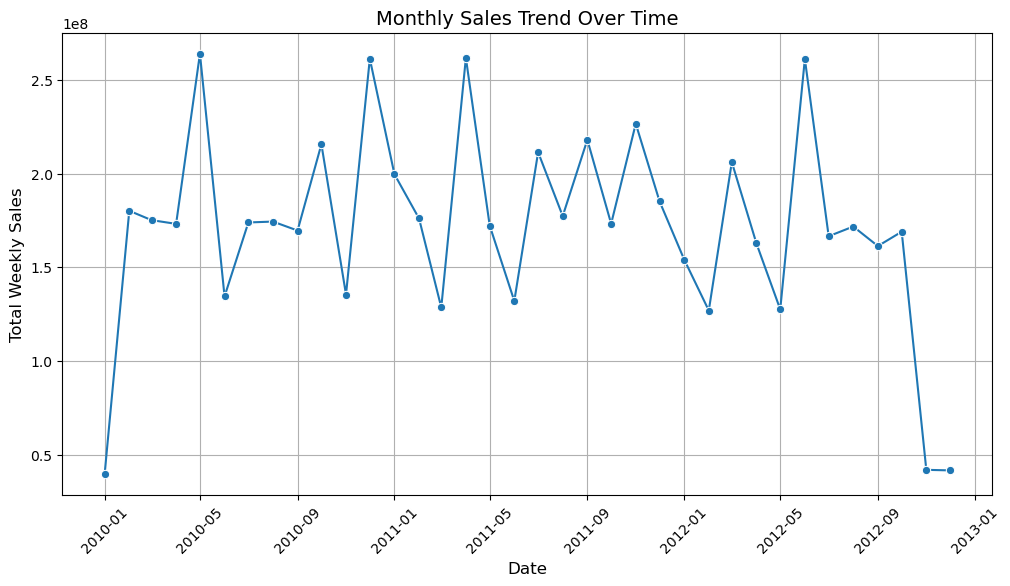

In [74]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Weekly Sales', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose

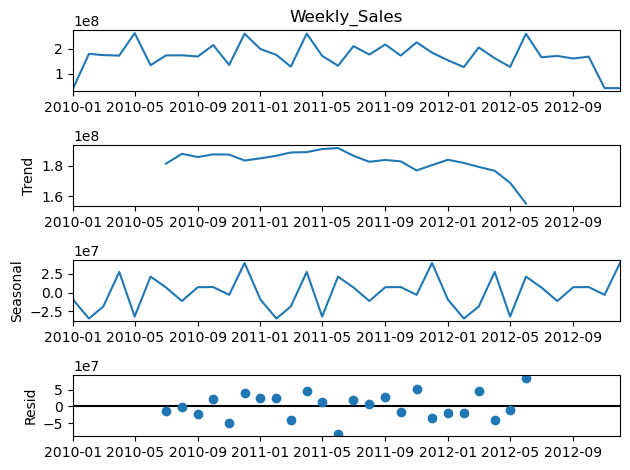

In [76]:
time_series = monthly_sales.set_index('Date')['Weekly_Sales']
decomposition = seasonal_decompose(time_series, model='additive', period=12)

# Plot the decomposed components
decomposition.plot()
plt.show()

# c. Does temperature affect the weekly sales in any manner?

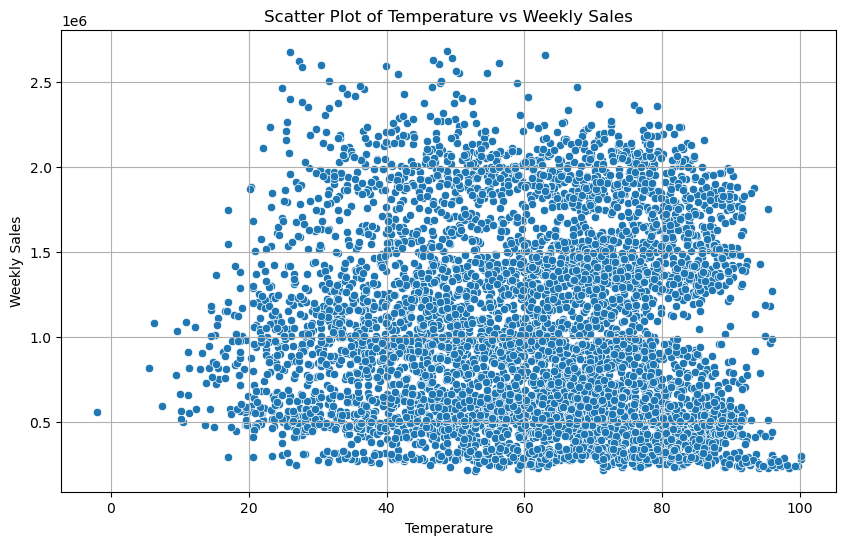

Correlation between Temperature and Weekly Sales: -0.040918195417938306


In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
plt.title('Scatter Plot of Temperature vs Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

# Correlation between Temperature and Weekly Sales
correlation = data[['Temperature', 'Weekly_Sales']].corr().iloc[0, 1]
print(f"Correlation between Temperature and Weekly Sales: {correlation}")


# d. How is the Consumer Price index affecting the weekly sales of various stores?

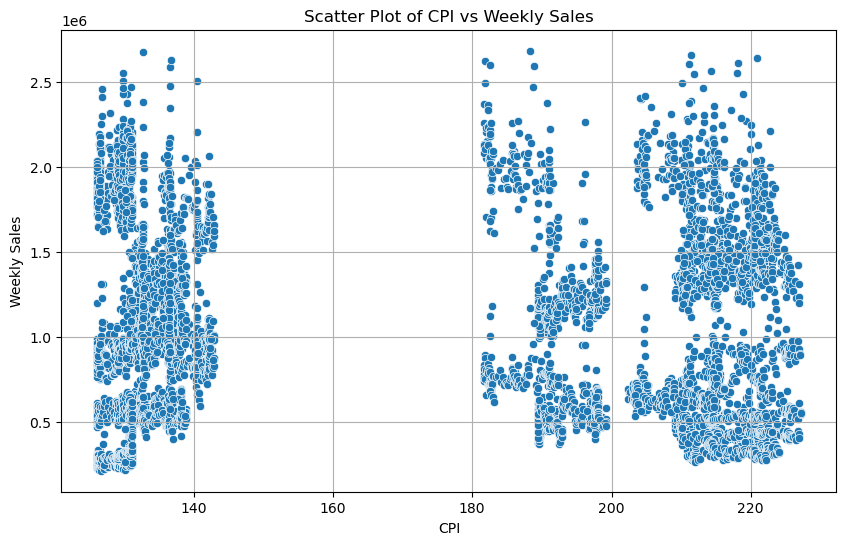

Correlation between CPI and Weekly Sales: -0.08295701939973645

Stores ranked by CPI impact on Weekly Sales (Regression Coefficient):
Store
4     57862.746079
23    37996.345469
13    27845.659146
41    23008.544624
39    21570.973664
dtype: float64


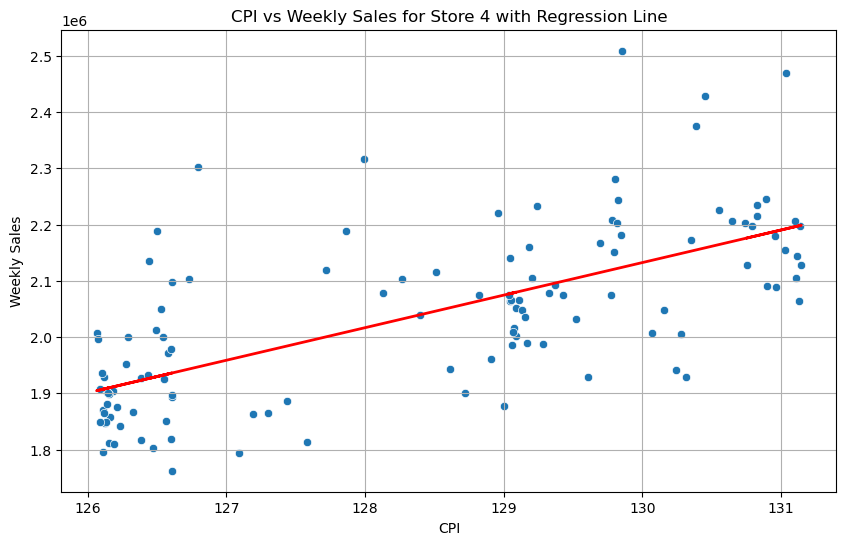

In [79]:
from sklearn.linear_model import LinearRegression
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=data)
plt.title('Scatter Plot of CPI vs Weekly Sales')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

# Correlation between CPI and Weekly Sales
correlation = data[['CPI', 'Weekly_Sales']].corr().iloc[0, 1]
print(f"Correlation between CPI and Weekly Sales: {correlation}")

# Perform linear regression (Weekly Sales ~ CPI) for each store
store_regression_cpi = data.groupby('Store').apply(
    lambda x: LinearRegression().fit(x[['CPI']].values, x['Weekly_Sales'].values).coef_[0]
)

# Rank stores based on the effect of CPI on weekly sales
store_cpi_impact = store_regression_cpi.sort_values(ascending=False)

print("\nStores ranked by CPI impact on Weekly Sales (Regression Coefficient):")
print(store_cpi_impact.head())

# Visualize the effect for the top store
top_store = store_cpi_impact.index[0]
top_store_data = data[data['Store'] == top_store]

X = top_store_data[['CPI']].values
y = top_store_data['Weekly_Sales'].values

# Perform linear regression for the top store
reg = LinearRegression().fit(X, y)

# Plot the regression line for the top store
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=top_store_data)
plt.plot(top_store_data['CPI'], reg.predict(X), color='red', linewidth=2)
plt.title(f'CPI vs Weekly Sales for Store {top_store} with Regression Line')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

# e. Top performing stores according to the historical data.

In [82]:
# Calculate total sales for each store
top_performing_stores = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).reset_index()

# Display the top 5 performing stores
top_performing_stores.head()


Store  Weekly_Sales
0     20  2.800237e+08
1     14  2.761276e+08
2      2  2.687221e+08
3     13  2.682025e+08
4     10  2.556789e+08

# f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.


In [83]:
# Find the worst-performing store by identifying the store with the lowest total sales
worst_performing_store = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=True).head(1)

# Calculate the difference between the highest and lowest performing stores
sales_difference = top_performing_stores.iloc[0] - worst_performing_store.iloc[0]

worst_performing_store, sales_difference


(Store
 38    7347378.89
 Name: Weekly_Sales, dtype: float64,
 Store          -7.347359e+06
 Weekly_Sales    2.726764e+08
 Name: 0, dtype: float64)

# 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks


In [92]:
from prophet import Prophet
from prophet.plot import plot_plotly

In [102]:
# Filter data for Store 1 (as an example)
for i in range(1,46):
    store_data = data[data['Store'] == i][['Date', 'Weekly_Sales']]

# Rename columns to fit Prophet's requirements
    store_data.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'}, inplace=True)
    
    
    model = Prophet()
# Fit the model on the store's sales data
    model.fit(store_data)


    future = model.make_future_dataframe(periods=12, freq='W')

# Make predictions
    forecast = model.predict(future)

# Print the forecasted sales for the next 12 weeks
    print("Store :",i)
    p=plot_plotly(model, forecast)
    p.show()
    


19:15:41 - cmdstanpy - INFO - Chain [1] start processing
19:15:41 - cmdstanpy - INFO - Chain [1] done processing


Store : 1


19:15:42 - cmdstanpy - INFO - Chain [1] start processing
19:15:42 - cmdstanpy - INFO - Chain [1] done processing


Store : 2


19:15:42 - cmdstanpy - INFO - Chain [1] start processing
19:15:42 - cmdstanpy - INFO - Chain [1] done processing


Store : 3


19:15:42 - cmdstanpy - INFO - Chain [1] start processing
19:15:42 - cmdstanpy - INFO - Chain [1] done processing


Store : 4


19:15:42 - cmdstanpy - INFO - Chain [1] start processing
19:15:42 - cmdstanpy - INFO - Chain [1] done processing


Store : 5


19:15:42 - cmdstanpy - INFO - Chain [1] start processing
19:15:43 - cmdstanpy - INFO - Chain [1] done processing


Store : 6


19:15:43 - cmdstanpy - INFO - Chain [1] start processing
19:15:43 - cmdstanpy - INFO - Chain [1] done processing


Store : 7


19:15:43 - cmdstanpy - INFO - Chain [1] start processing
19:15:43 - cmdstanpy - INFO - Chain [1] done processing


Store : 8


19:15:43 - cmdstanpy - INFO - Chain [1] start processing
19:15:43 - cmdstanpy - INFO - Chain [1] done processing


Store : 9


19:15:43 - cmdstanpy - INFO - Chain [1] start processing
19:15:43 - cmdstanpy - INFO - Chain [1] done processing


Store : 10


19:15:44 - cmdstanpy - INFO - Chain [1] start processing
19:15:44 - cmdstanpy - INFO - Chain [1] done processing


Store : 11


19:15:44 - cmdstanpy - INFO - Chain [1] start processing
19:15:44 - cmdstanpy - INFO - Chain [1] done processing


Store : 12


19:15:44 - cmdstanpy - INFO - Chain [1] start processing
19:15:44 - cmdstanpy - INFO - Chain [1] done processing


Store : 13


19:15:44 - cmdstanpy - INFO - Chain [1] start processing
19:15:44 - cmdstanpy - INFO - Chain [1] done processing


Store : 14


19:15:45 - cmdstanpy - INFO - Chain [1] start processing
19:15:45 - cmdstanpy - INFO - Chain [1] done processing


Store : 15


19:15:45 - cmdstanpy - INFO - Chain [1] start processing
19:15:45 - cmdstanpy - INFO - Chain [1] done processing


Store : 16


19:15:45 - cmdstanpy - INFO - Chain [1] start processing
19:15:45 - cmdstanpy - INFO - Chain [1] done processing


Store : 17


19:15:45 - cmdstanpy - INFO - Chain [1] start processing
19:15:45 - cmdstanpy - INFO - Chain [1] done processing


Store : 18


19:15:45 - cmdstanpy - INFO - Chain [1] start processing
19:15:46 - cmdstanpy - INFO - Chain [1] done processing


Store : 19


19:15:46 - cmdstanpy - INFO - Chain [1] start processing
19:15:46 - cmdstanpy - INFO - Chain [1] done processing


Store : 20


19:15:46 - cmdstanpy - INFO - Chain [1] start processing
19:15:46 - cmdstanpy - INFO - Chain [1] done processing


Store : 21


19:15:46 - cmdstanpy - INFO - Chain [1] start processing
19:15:46 - cmdstanpy - INFO - Chain [1] done processing


Store : 22


19:15:46 - cmdstanpy - INFO - Chain [1] start processing
19:15:47 - cmdstanpy - INFO - Chain [1] done processing


Store : 23


19:15:47 - cmdstanpy - INFO - Chain [1] start processing
19:15:47 - cmdstanpy - INFO - Chain [1] done processing


Store : 24


19:15:47 - cmdstanpy - INFO - Chain [1] start processing
19:15:47 - cmdstanpy - INFO - Chain [1] done processing


Store : 25


19:15:47 - cmdstanpy - INFO - Chain [1] start processing
19:15:47 - cmdstanpy - INFO - Chain [1] done processing


Store : 26


19:15:48 - cmdstanpy - INFO - Chain [1] start processing
19:15:48 - cmdstanpy - INFO - Chain [1] done processing


Store : 27


19:15:48 - cmdstanpy - INFO - Chain [1] start processing
19:15:48 - cmdstanpy - INFO - Chain [1] done processing


Store : 28


19:15:48 - cmdstanpy - INFO - Chain [1] start processing
19:15:48 - cmdstanpy - INFO - Chain [1] done processing


Store : 29


19:15:48 - cmdstanpy - INFO - Chain [1] start processing
19:15:48 - cmdstanpy - INFO - Chain [1] done processing


Store : 30


19:15:49 - cmdstanpy - INFO - Chain [1] start processing
19:15:49 - cmdstanpy - INFO - Chain [1] done processing


Store : 31


19:15:49 - cmdstanpy - INFO - Chain [1] start processing
19:15:49 - cmdstanpy - INFO - Chain [1] done processing


Store : 32


19:15:49 - cmdstanpy - INFO - Chain [1] start processing
19:15:49 - cmdstanpy - INFO - Chain [1] done processing


Store : 33


19:15:49 - cmdstanpy - INFO - Chain [1] start processing
19:15:49 - cmdstanpy - INFO - Chain [1] done processing


Store : 34


19:15:50 - cmdstanpy - INFO - Chain [1] start processing
19:15:50 - cmdstanpy - INFO - Chain [1] done processing


Store : 35


19:15:50 - cmdstanpy - INFO - Chain [1] start processing
19:15:50 - cmdstanpy - INFO - Chain [1] done processing


Store : 36


19:15:50 - cmdstanpy - INFO - Chain [1] start processing
19:15:50 - cmdstanpy - INFO - Chain [1] done processing


Store : 37


19:15:50 - cmdstanpy - INFO - Chain [1] start processing
19:15:50 - cmdstanpy - INFO - Chain [1] done processing


Store : 38


19:15:51 - cmdstanpy - INFO - Chain [1] start processing
19:15:51 - cmdstanpy - INFO - Chain [1] done processing


Store : 39


19:15:51 - cmdstanpy - INFO - Chain [1] start processing
19:15:51 - cmdstanpy - INFO - Chain [1] done processing


Store : 40


19:15:51 - cmdstanpy - INFO - Chain [1] start processing
19:15:51 - cmdstanpy - INFO - Chain [1] done processing


Store : 41


19:15:51 - cmdstanpy - INFO - Chain [1] start processing
19:15:51 - cmdstanpy - INFO - Chain [1] done processing


Store : 42


19:15:52 - cmdstanpy - INFO - Chain [1] start processing
19:15:52 - cmdstanpy - INFO - Chain [1] done processing


Store : 43


19:15:52 - cmdstanpy - INFO - Chain [1] start processing
19:15:52 - cmdstanpy - INFO - Chain [1] done processing


Store : 44


19:15:52 - cmdstanpy - INFO - Chain [1] start processing
19:15:52 - cmdstanpy - INFO - Chain [1] done processing


Store : 45
